In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
df_train = pd.read_csv('/kaggle/input/coffee-data/X_train.csv')
y_label = pd.read_csv("/kaggle/input/coffee-data/y_train.csv")
df_test = pd.read_csv("/kaggle/input/coffee-data/X_test.csv")
df_train['class'] = y_label['class']
df_train.shape

(620, 7)

In [ ]:
# Preprocessing
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)

    # Lowercasing and removing punctuation
    tokens = [token.lower() for token in tokens if token.isalnum()]

    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]

    return ' '.join(tokens)

In [ ]:
# dropping rows which have NAN values from Training Data
df_train.dropna(inplace=True)

# Changing categorical data into numerical values for origin and roast column for Training Data
label_encoder = LabelEncoder()
df_train['origin'] = label_encoder.fit_transform(df_train['origin'])
df_train['roast'] = label_encoder.fit_transform(df_train['roast'])

# Applying normalization on 100g_USD column with Min-Max Scaling
#min_max_scaler = MinMaxScaler()
#df['100g_USD'] = min_max_scaler.fit_transform(df[['100g_USD']])
df_train.head()

,coffee_id,roaster,roast,origin,100g_USD,review,class
0,1014,Kakalove Cafe,4,21,11.33,"Delicate, fruit-forward. Blueberry, molasses, ...",0
2,1094,Simon Hsieh Aroma Roast Coffees,2,14,12.04,"Evaluated as espresso. Richly chocolaty, compl...",1
3,142,JBC Coffee Roasters,4,9,5.51,"Floral, bright, citrusy, balanced. Star jasmin...",1
4,647,Roast House,4,9,4.19,"Delicate, sweetly spice-toned. Pink peppercorn...",0
5,1159,Kakalove Cafe,4,9,3.89,"Intricately layered, deeply sweet. Wisteria, c...",1


<Axes: >

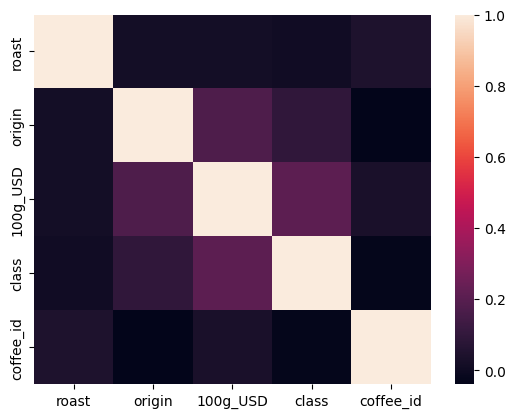

In [ ]:
#Calculating correaltion matrix, it summarizes the relation between multiple variables
#0-indicates no relationship and 1 indicates positive relationship
columns_to_map = ['roast', 'origin','100g_USD','class','coffee_id']
df_train[columns_to_map].corr()
sns.heatmap(df_train[columns_to_map].corr())

In [ ]:
# dropping useless columns for Training Data
columns_to_drop = ['coffee_id', 'roaster','roast']
df_train.drop(columns_to_drop, axis=1, inplace=True)

df_train

,origin,100g_USD,review,class
0,21,11.33,"Delicate, fruit-forward. Blueberry, molasses, ...",0
2,14,12.04,"Evaluated as espresso. Richly chocolaty, compl...",1
3,9,5.51,"Floral, bright, citrusy, balanced. Star jasmin...",1
4,9,4.19,"Delicate, sweetly spice-toned. Pink peppercorn...",0
5,9,3.89,"Intricately layered, deeply sweet. Wisteria, c...",1
...,...,...,...,...
615,14,9.24,"Rich-toned, deeply aromatic. Black currant, to...",1
616,9,4.93,"Cleanly fruit-toned, delicately sweet-tart. Ra...",1
617,9,5.66,"Richly aromatic, sweetly tart. Boysenberry, st...",1
618,10,5.88,"Evaluated as espresso. Multi-layered, complex....",1


In [ ]:
# Apply preprocessing to the review column for Training Data
df_train['review'] = df_train['review'].apply(preprocess_text)
df_train

,origin,100g_USD,review,class
0,21,11.33,delic blueberri molass fir magnolia bay leaf a...,0
2,14,12.04,evalu espresso richli chocolati complex chocol...,1
3,9,5.51,floral bright citrusi balanc star jasmin cocoa...,1
4,9,4.19,delic sweetli pink peppercorn date myrrh laven...,0
5,9,3.89,intric layer deepli sweet wisteria cocoa nib n...,1
...,...,...,...,...
615,14,9.24,deepli aromat black currant toffe narcissu ced...,1
616,9,4.93,cleanli delic raspberri bergamot cocoa nib hon...,1
617,9,5.66,richli aromat sweetli tart boysenberri star ja...,1
618,10,5.88,evalu espresso complex dark chocol dri apricot...,1


In [ ]:
# Fit CountVectorizer on Training Data
count_vectorizer = CountVectorizer()
count_vectorizer.fit(df_train["review"])

# Convert processed reviews to bag-of-words features for Training Data
X_train = count_vectorizer.transform(df_train['review'])
#print("printing count: " + "\n"+ str(X_train.toarray()) )

#print("Print Vocabulary: "+str(count_vectorizer.vocabulary_)+"\n\n")
#count_vectorizer.get_feature_names_out()
#print("Features Name: "+str(count_vectorizer.get_feature_names_out())+"\n\n")

In [ ]:
# Create DataFrame with CountVectorizer features for Training Data
df_count_vectorized_train = pd.DataFrame(X_train.toarray(), columns=count_vectorizer.get_feature_names_out())

In [ ]:
# Reset index of the original DataFrames
df_train.reset_index(drop=True, inplace=True)

# Concatenate the new DataFrames with the original DataFrames
df_train_show = pd.concat([df_train, df_count_vectorized_train], axis=1)

# Now, check the DataFrame
df_train_show

,origin,100g_USD,review,class,access,acid,acorn,add,agav,age,...,wini,winter,wisteria,wood,yellow,yet,yogurt,young,zest,zesti
0,21,11.33,delic blueberri molass fir magnolia bay leaf a...,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,14,12.04,evalu espresso richli chocolati complex chocol...,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,5.51,floral bright citrusi balanc star jasmin cocoa...,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,9,4.19,delic sweetli pink peppercorn date myrrh laven...,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,3.89,intric layer deepli sweet wisteria cocoa nib n...,1,0,1,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,14,9.24,deepli aromat black currant toffe narcissu ced...,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
607,9,4.93,cleanli delic raspberri bergamot cocoa nib hon...,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
608,9,5.66,richli aromat sweetli tart boysenberri star ja...,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
609,10,5.88,evalu espresso complex dark chocol dri apricot...,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.metrics import f1_score

# Initialize KFold with the specified number of folds
kf = KFold(n_splits=5)

# Perform cross-validation and track best model
best_model = None
best_f1_score = 0

# Perform cross-validation and compute F1 scores
cv_f1_scores = []
train_f1_scores = []  # List to store training F1 scores
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = df_train['class'][train_index], df_train['class'][val_index]

    # Initialize Naive Bayes classifier
    nb_classifier = MultinomialNB()

    # Train the classifier on the training fold
    nb_classifier.fit(X_train_fold, y_train_fold)


    # Predict on the validation fold
    val_predictions = nb_classifier.predict(X_val_fold)

    # Calculate F1 score for the validation fold
    val_f1_score = f1_score(y_val_fold, val_predictions)
    cv_f1_scores.append(val_f1_score)

    # Predict on the training fold
    train_predictions = nb_classifier.predict(X_train_fold)

    # Calculate F1 score for the training fold
    train_f1_score = f1_score(y_train_fold, train_predictions)
    train_f1_scores.append(train_f1_score)

    # Storing the best model and value
    if val_f1_score > best_f1_score:
        best_model = nb_classifier
        best_f1_score = val_f1_score

# Train the best model on entire training data
best_model.fit(X_train, df_train['class'])


print("Training F1 Scores:", train_f1_scores)
print("Validation F1 Scores:", cv_f1_scores)


Training F1 Scores: [0.9701726844583988, 0.9768160741885625, 0.9739663093415009, 0.9680511182108626, 0.9766718506998445]
Validation F1 Scores: [0.9375000000000001, 0.9487179487179487, 0.92, 0.9767441860465116, 0.9192546583850932]


In [ ]:
#retrieving the count of each word or feature in each class
feature_counts = nb_classifier.feature_count_
# print(feature_counts)


#calculating total count of features
class_totals = np.sum(feature_counts, axis=1, keepdims=True)
# print(class_totals)

# # Calculate feature probabilities
feature_probs = feature_counts / np.sum(feature_counts, axis=1, keepdims=True)
# print(feature_probs)

# Get feature names (words)
feature_names = count_vectorizer.get_feature_names_out()
# print(feature_names)


top_words_class_0=[]
top_words_class_1=[]
top_probs_class_0 = []
top_probs_class_1 = []

for class_index in range(feature_probs.shape[0]):
    class_probs = feature_probs[class_index]
    class_name = f"Class {class_index}"

    # Find indices of highest feature probabilities
    highest_prob_indices = np.argsort(class_probs)[-10:]  #Considering Top 10 features

    # Get the corresponding feature names
    highest_prob_features = [feature_names[i] for i in highest_prob_indices]
    highest_prob_values = [class_probs[i] for i in highest_prob_indices]


    if class_index == 0:
        top_words_class_0 = sorted(zip(highest_prob_features, highest_prob_values), key=lambda x: x[1], reverse=True)[:10]  # Top words for class 0
    else:
        top_words_class_1 = sorted(zip(highest_prob_features, highest_prob_values), key=lambda x: x[1], reverse=True)[:10]  # Top words for class 0


print("\nTop Words for Class 0:\n", *top_words_class_0,sep='\n')
print("\nTop Words for Class 1:\n", *top_words_class_1,sep='\n')




Top Words for Class 0:

('cup', 0.038805268109125116)
('aroma', 0.03857008466603951)
('finish', 0.0383349012229539)
('mouthfeel', 0.03786453433678269)
('sweet', 0.034571966133584195)
('structur', 0.03292568203198495)
('chocol', 0.030103480714957668)
('acid', 0.030103480714957668)
('note', 0.022107243650047036)
('cedar', 0.021401693320790217)

Top Words for Class 1:

('cup', 0.03952612931798052)
('aroma', 0.03675819309123118)
('finish', 0.035761736049601416)
('mouthfeel', 0.03487599645704163)
('acid', 0.02945084145261293)
('structur', 0.028675819309123118)
('chocol', 0.022586359610274578)
('note', 0.019596988485385297)
('sweet', 0.019154118689105402)
('richli', 0.018600531443755536)


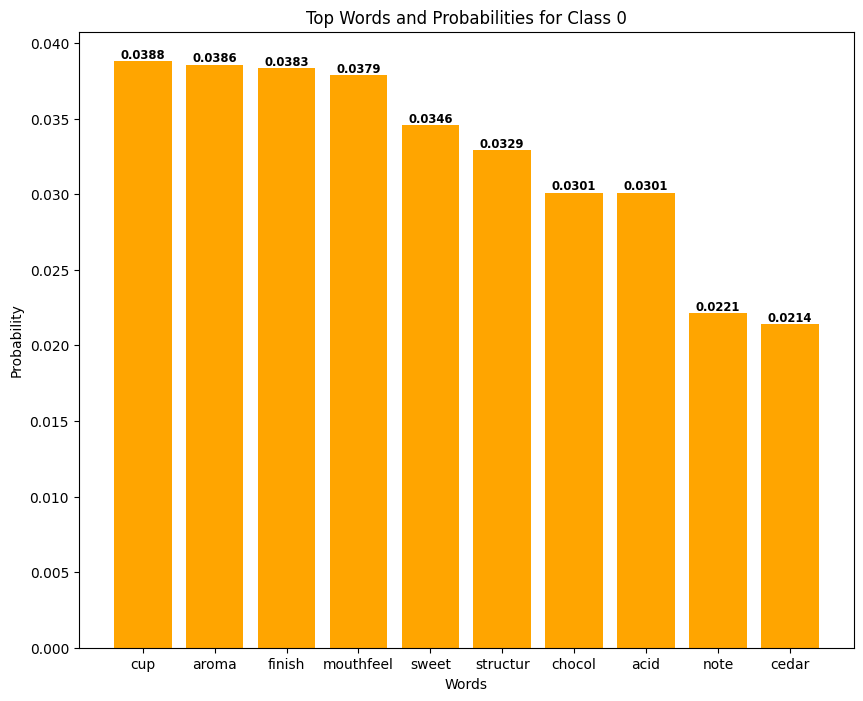

In [ ]:
#Plotting top words and their corresponding probabilities
plt.figure(figsize=(10, 8))
y=[word[1] for word in top_words_class_0]
plt.bar([word[0] for word in top_words_class_0], y, color='orange')
plt.xlabel('Words')
plt.ylabel('Probability')
plt.title('Top Words and Probabilities for Class 0')
for index, value in enumerate(y):
    plt.text(index, value, f'{value:.4f}', ha='center', va='bottom',color='black',fontweight='bold',size='small')

# plt.gca().invert_yaxis()
plt.show()

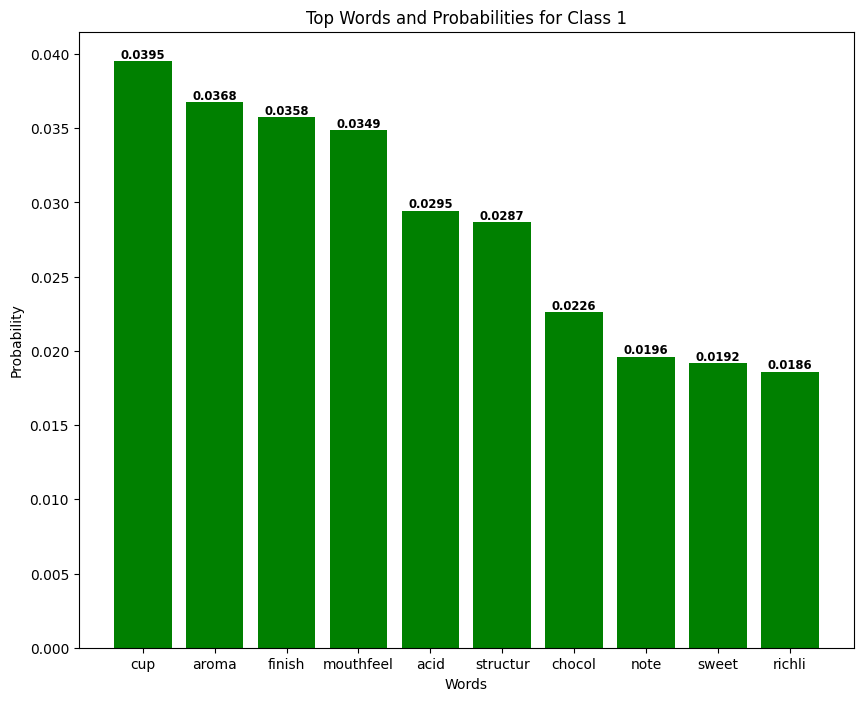

In [ ]:
plt.figure(figsize=(10,8))
y=[word[1] for word in top_words_class_1]
bar=plt.bar([word[0] for word in top_words_class_1], y, color='green')
plt.xlabel('Words')
plt.ylabel('Probability')
plt.title('Top Words and Probabilities for Class 1')
for index, value in enumerate(y):
    plt.text(index, value, f'{value:.4f}', ha='center', va='bottom',color='black',fontweight='bold',size='small')

# plt.gca().invert_yaxis()
plt.show()

In [ ]:
# dropping rows which have NAN values from Testing Data
df_test.dropna(inplace=True)

# Changing categorical data into numerical values for origin and roast column for Testing Data
df_test['origin'] = label_encoder.fit_transform(df_test['origin'])
# df_test['roast'] = label_encoder.fit_transform(df_test['roast'])

# dropping useless columns for Testing Data
#columns_to_drop = ['coffee_id', 'roaster']
df_test.drop(columns_to_drop, axis=1, inplace=True)

In [ ]:
# Apply preprocessing to the review column for Testing Data
df_test['review'] = df_test['review'].apply(preprocess_text)

# Fit CountVectorizer on Testing Data
#count_vectorizer = CountVectorizer()
#count_vectorizer.fit(df_test["review"])

# Convert processed reviews to bag-of-words features for Testing Data
X_test = count_vectorizer.transform(df_test['review'])

# Create DataFrame with CountVectorizer features for Testing Data
df_count_vectorized_test = pd.DataFrame(X_test.toarray(), columns=count_vectorizer.get_feature_names_out())


In [ ]:
# Reset index of the original DataFrames
df_test.reset_index(drop=True, inplace=True)

# Concatenate the new DataFrames with the original DataFrames
df_test_show = pd.concat([df_test, df_count_vectorized_test], axis=1)

# Now, check the DataFrame
df_test_show

,origin,100g_USD,review,access,acid,acorn,add,agav,age,agreeabl,...,wini,winter,wisteria,wood,yellow,yet,yogurt,young,zest,zesti
0,9,22.02,complexli layer vibrantli aromat black cherri ...,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,5.57,deepli pungent richli dark chocol cranberri sa...,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,7,6.51,eleg delic sweetli tart bergamot dri apricot c...,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,17.62,delic apricot honeysuckl cocoa nib white peppe...,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,8.21,richli impecc balanc violet blackberri honey c...,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,11,6.47,floral chocolati dark chocol honeysuckl tamari...,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
263,14,2.36,richli aromat complex star jasmin cocoa nib be...,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
264,7,5.29,profoundli sweet clementin orang jolli rancher...,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
265,7,4.12,sweetli cashew butter cocoa powder magnolia da...,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Predict on the test data with best model from cross validation
test_preds = best_model.predict(X_test)

# Save results to CSV
df_test['class'] = test_preds
df_test['class'].to_csv('/kaggle/working/result.csv', index=False)